In [1]:
import pandas as pd

df = pd.read_csv("retail_store_sales.csv")
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,NaN
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [2]:
df.isnull().sum()

Transaction ID         0
Customer ID            0
Category               0
Item                1213
Price Per Unit       609
Quantity             604
Total Spent          604
Payment Method         0
Location               0
Transaction Date       0
Discount Applied    4199
dtype: int64

In [3]:
(df.isnull().sum() / len(df)) * 100

Transaction ID       0.000000
Customer ID          0.000000
Category             0.000000
Item                 9.646123
Price Per Unit       4.842942
Quantity             4.803181
Total Spent          4.803181
Payment Method       0.000000
Location             0.000000
Transaction Date     0.000000
Discount Applied    33.391650
dtype: float64

In [4]:
df = df.dropna(subset=["Item"])

In [5]:
# If Price Per Unit is missing but we have Quantity & Total Spent
mask = df["Price Per Unit"].isnull() & df["Quantity"].notnull() & df["Total Spent"].notnull()
df.loc[mask, "Price Per Unit"] = df.loc[mask, "Total Spent"] / df.loc[mask, "Quantity"]

# If Quantity is missing but we have Price Per Unit & Total Spent
mask = df["Quantity"].isnull() & df["Price Per Unit"].notnull() & df["Total Spent"].notnull()
df.loc[mask, "Quantity"] = df.loc[mask, "Total Spent"] / df.loc[mask, "Price Per Unit"]

# If Total Spent is missing but we have Price Per Unit & Quantity
mask = df["Total Spent"].isnull() & df["Price Per Unit"].notnull() & df["Quantity"].notnull()
df.loc[mask, "Total Spent"] = df.loc[mask, "Price Per Unit"] * df.loc[mask, "Quantity"]

In [6]:
df["Discount Applied"] = df["Discount Applied"].fillna(0).astype(bool)

In [7]:
df.isnull().sum()

Transaction ID      0
Customer ID         0
Category            0
Item                0
Price Per Unit      0
Quantity            0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Discount Applied    0
dtype: int64

In [8]:
# 1. Check uniqueness of Transaction IDs
df["Transaction ID"].nunique(), len(df)

(11362, 11362)

In [9]:
# 2. Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [10]:
# 3. Verify calculation consistency
mismatch_mask = df["Price Per Unit"] * df["Quantity"] != df["Total Spent"]
df[mismatch_mask].head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied


In [11]:
# Convert Transaction Date to datetime
df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])

# Ensure numeric columns are numbers
df["Price Per Unit"] = pd.to_numeric(df["Price Per Unit"], errors="coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Total Spent"] = pd.to_numeric(df["Total Spent"], errors="coerce")

# Discount Applied already converted to Boolean earlier
df["Discount Applied"] = df["Discount Applied"].astype(bool)

In [12]:
# Standardize Payment Method (e.g., 'credit card', 'Credit Card', etc.)
df["Payment Method"] = df["Payment Method"].str.strip().str.title()

# Standardize Location ('online', 'Online ', etc.)
df["Location"] = df["Location"].str.strip().str.title()

# Standardize Category names
df["Category"] = df["Category"].str.strip().str.title()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11362 entries, 0 to 12574
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    11362 non-null  object        
 1   Customer ID       11362 non-null  object        
 2   Category          11362 non-null  object        
 3   Item              11362 non-null  object        
 4   Price Per Unit    11362 non-null  float64       
 5   Quantity          11362 non-null  float64       
 6   Total Spent       11362 non-null  float64       
 7   Payment Method    11362 non-null  object        
 8   Location          11362 non-null  object        
 9   Transaction Date  11362 non-null  datetime64[ns]
 10  Discount Applied  11362 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(6)
memory usage: 987.5+ KB


In [14]:
df.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,Digital Wallet,Online,2024-04-08,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,Digital Wallet,Online,2023-07-23,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,Credit Card,Online,2022-10-05,False
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,Credit Card,Online,2022-05-07,False
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,Digital Wallet,Online,2022-10-02,False


In [15]:
len(df)

11362

In [16]:
df["Customer ID"].nunique()

25

In [17]:
df["Category"].value_counts()

Category
Furniture                             1460
Electric Household Essentials         1437
Beverages                             1427
Food                                  1426
Milk Products                         1425
Butchers                              1421
Computers And Electric Accessories    1397
Patisserie                            1369
Name: count, dtype: int64

In [18]:
df["Payment Method"].value_counts()

Payment Method
Cash              3917
Credit Card       3729
Digital Wallet    3716
Name: count, dtype: int64

In [19]:
(df["Location"] == "Online").value_counts()

Location
True     5745
False    5617
Name: count, dtype: int64

In [20]:
(df["Location"] == "In-Store").value_counts()

Location
False    5745
True     5617
Name: count, dtype: int64

In [21]:
df["Total Spent"].mean()

np.float64(129.64253652525963)

In [22]:
df["Quantity"].median()

6.0

In [23]:
df.groupby("Customer ID")["Total Spent"].sum().sort_values(ascending=False).head(10)

Customer ID
CUST_24    64608.0
CUST_05    63855.5
CUST_16    63185.5
CUST_13    63015.5
CUST_08    62850.5
CUST_15    60749.5
CUST_10    60367.5
CUST_23    59738.5
CUST_21    59639.0
CUST_02    59512.5
Name: Total Spent, dtype: float64

In [24]:
df["Customer ID"].value_counts().head(10)

Customer ID
CUST_05    497
CUST_13    491
CUST_24    489
CUST_08    480
CUST_15    478
CUST_16    469
CUST_09    465
CUST_01    461
CUST_10    458
CUST_20    457
Name: count, dtype: int64

In [25]:
df.groupby("Customer ID")["Category"].nunique().sort_values(ascending=False).head(10)

Customer ID
CUST_01    8
CUST_02    8
CUST_03    8
CUST_04    8
CUST_05    8
CUST_06    8
CUST_07    8
CUST_08    8
CUST_09    8
CUST_10    8
Name: Category, dtype: int64

In [26]:
df.groupby("Customer ID")["Location"].value_counts().unstack(fill_value=0).head(10)

Location,In-Store,Online
Customer ID,,
CUST_01,230,231
CUST_02,234,213
CUST_03,207,216
CUST_04,225,203
CUST_05,241,256
CUST_06,239,204
CUST_07,205,228
CUST_08,229,251
CUST_09,220,245


In [27]:
df.groupby("Customer ID")["Total Spent"].mean().sort_values(ascending=False).head(10)

Customer ID
CUST_04    135.418224
CUST_03    135.106383
CUST_16    134.723881
CUST_19    133.547564
CUST_21    133.420582
CUST_02    133.137584
CUST_23    132.752222
CUST_24    132.122699
CUST_07    131.834873
CUST_10    131.806769
Name: Total Spent, dtype: float64

In [28]:
df.groupby("Category")["Total Spent"].sum().sort_values(ascending=False)

Category
Butchers                              197426.0
Electric Household Essentials         192441.5
Beverages                             187978.5
Furniture                             186527.0
Food                                  184645.0
Computers And Electric Accessories    180902.5
Patisserie                            172330.5
Milk Products                         170747.5
Name: Total Spent, dtype: float64

In [29]:
df.groupby("Category")["Total Spent"].mean().sort_values(ascending=False)

Category
Butchers                              138.934553
Electric Household Essentials         133.918928
Beverages                             131.729853
Computers And Electric Accessories    129.493558
Food                                  129.484572
Furniture                             127.758219
Patisserie                            125.880570
Milk Products                         119.822807
Name: Total Spent, dtype: float64

In [30]:
df.groupby("Category")["Quantity"].sum().sort_values(ascending=False)

Category
Furniture                             8083.0
Beverages                             7974.0
Food                                  7925.0
Electric Household Essentials         7897.0
Milk Products                         7889.0
Computers And Electric Accessories    7832.0
Butchers                              7774.0
Patisserie                            7515.0
Name: Quantity, dtype: float64

In [31]:
df.groupby("Category")["Discount Applied"].mean().sort_values(ascending=False) * 100

Category
Computers And Electric Accessories    34.359341
Patisserie                            34.258583
Butchers                              34.201267
Milk Products                         33.894737
Furniture                             33.698630
Beverages                             33.006307
Electric Household Essentials         32.776618
Food                                  31.486676
Name: Discount Applied, dtype: float64

In [32]:
df.groupby("Category")["Customer ID"].nunique().sort_values(ascending=False)

Category
Beverages                             25
Butchers                              25
Computers And Electric Accessories    25
Electric Household Essentials         25
Food                                  25
Furniture                             25
Milk Products                         25
Patisserie                            25
Name: Customer ID, dtype: int64

In [33]:
df["Transaction Date"].min(), df["Transaction Date"].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2025-01-18 00:00:00'))

In [34]:
df["YearMonth"] = df["Transaction Date"].dt.to_period("M")
df.groupby("YearMonth")["Transaction ID"].count().head(10)

YearMonth
2022-01    349
2022-02    305
2022-03    320
2022-04    319
2022-05    302
2022-06    309
2022-07    324
2022-08    311
2022-09    322
2022-10    284
Freq: M, Name: Transaction ID, dtype: int64

In [35]:
df.groupby(df["Transaction Date"].dt.to_period("M"))["Transaction ID"].count().sort_values(ascending=False).head()

Transaction Date
2022-01    349
2023-01    347
2024-08    344
2024-12    343
2024-01    339
Freq: M, Name: Transaction ID, dtype: int64

In [36]:
df.groupby(df["Transaction Date"].dt.to_period("M"))["Total Spent"].sum().sort_values(ascending=False).head()

Transaction Date
2022-01    50525.0
2024-12    46292.5
2023-01    45989.5
2024-01    44885.0
2022-09    44287.0
Freq: M, Name: Total Spent, dtype: float64

In [37]:
df["Year"] = df["Transaction Date"].dt.year
df.groupby("Year")["Total Spent"].mean()

Year
2022    129.631022
2023    129.172313
2024    130.204954
2025    127.428947
Name: Total Spent, dtype: float64

In [38]:
df.groupby(df["Transaction Date"].dt.to_period("M"))["Discount Applied"].mean() * 100

Transaction Date
2022-01    38.108883
2022-02    35.737705
2022-03    34.687500
2022-04    30.094044
2022-05    34.768212
2022-06    32.038835
2022-07    34.567901
2022-08    31.189711
2022-09    33.850932
2022-10    32.042254
2022-11    32.165605
2022-12    36.462094
2023-01    33.141210
2023-02    37.050360
2023-03    28.624535
2023-04    30.952381
2023-05    29.605263
2023-06    35.937500
2023-07    34.534535
2023-08    28.619529
2023-09    40.468227
2023-10    30.656934
2023-11    31.985294
2023-12    32.484076
2024-01    34.218289
2024-02    31.833910
2024-03    37.500000
2024-04    32.638889
2024-05    33.433735
2024-06    31.111111
2024-07    35.646688
2024-08    31.395349
2024-09    33.650794
2024-10    35.076923
2024-11    36.363636
2024-12    32.653061
2025-01    29.473684
Freq: M, Name: Discount Applied, dtype: float64

In [39]:
df["Payment Method"].value_counts()

Payment Method
Cash              3917
Credit Card       3729
Digital Wallet    3716
Name: count, dtype: int64

In [40]:
df.groupby("Payment Method")["Total Spent"].sum().sort_values(ascending=False)

Payment Method
Cash              513676.0
Credit Card       481135.0
Digital Wallet    478187.5
Name: Total Spent, dtype: float64

In [41]:
df.groupby("Payment Method")["Total Spent"].mean()

Payment Method
Cash              131.140158
Credit Card       129.025208
Digital Wallet    128.683396
Name: Total Spent, dtype: float64

In [42]:
(df["Discount Applied"].mean() * 100)

np.float64(33.45361732089421)

In [43]:
df.groupby("Discount Applied")["Quantity"].mean()

Discount Applied
False    5.538685
True     5.527756
Name: Quantity, dtype: float64

In [44]:
df.groupby("Discount Applied")["Total Spent"].sum()

Discount Applied
False    976118.0
True     496880.5
Name: Total Spent, dtype: float64

In [45]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df["Total Spent"]))
df[z > 3]

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,YearMonth,Year


In [46]:
Q1 = df["Total Spent"].quantile(0.25)
Q3 = df["Total Spent"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Total Spent"] < Q1 - 1.5*IQR) | (df["Total Spent"] > Q3 + 1.5*IQR)]
outliers

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Payment Method,Location,Transaction Date,Discount Applied,YearMonth,Year
27,TXN_1599706,CUST_14,Furniture,Item_25_FUR,41.0,10.0,410.0,Credit Card,In-Store,2024-03-24,True,2024-03,2024
133,TXN_2953434,CUST_25,Furniture,Item_25_FUR,41.0,10.0,410.0,Credit Card,In-Store,2023-08-10,False,2023-08,2023
339,TXN_4374445,CUST_12,Food,Item_25_FOOD,41.0,10.0,410.0,Digital Wallet,Online,2024-10-17,False,2024-10,2024
869,TXN_1814138,CUST_06,Beverages,Item_25_BEV,41.0,10.0,410.0,Credit Card,In-Store,2024-11-16,False,2024-11,2024
1060,TXN_3710081,CUST_25,Furniture,Item_25_FUR,41.0,10.0,410.0,Digital Wallet,In-Store,2023-08-12,False,2023-08,2023
1088,TXN_1273334,CUST_22,Beverages,Item_25_BEV,41.0,10.0,410.0,Digital Wallet,In-Store,2022-11-04,True,2022-11,2022
1468,TXN_1938135,CUST_17,Butchers,Item_25_BUT,41.0,10.0,410.0,Digital Wallet,In-Store,2023-12-20,True,2023-12,2023
1505,TXN_8520397,CUST_12,Electric Household Essentials,Item_25_EHE,41.0,10.0,410.0,Credit Card,Online,2024-03-27,True,2024-03,2024
1568,TXN_8048041,CUST_14,Butchers,Item_25_BUT,41.0,10.0,410.0,Credit Card,In-Store,2023-12-25,True,2023-12,2023
1950,TXN_1860120,CUST_01,Furniture,Item_25_FUR,41.0,10.0,410.0,Digital Wallet,Online,2022-01-19,True,2022-01,2022


In [47]:
Q1 = df["Quantity"].quantile(0.25)
Q3 = df["Quantity"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Quantity"] < lower_bound) | (df["Quantity"] > upper_bound)]
outliers.shape

(0, 13)

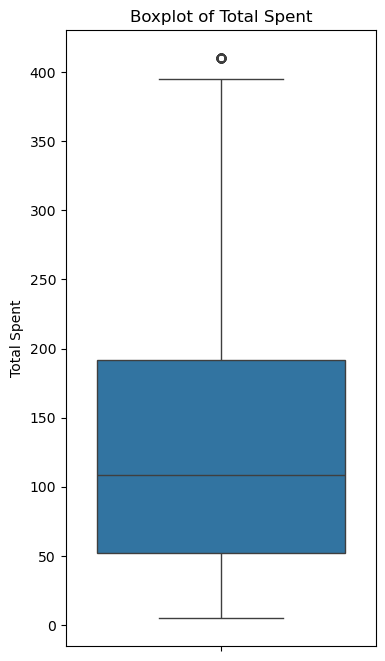

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,8))
sns.boxplot(y=df["Total Spent"])
plt.title("Boxplot of Total Spent")
plt.show()

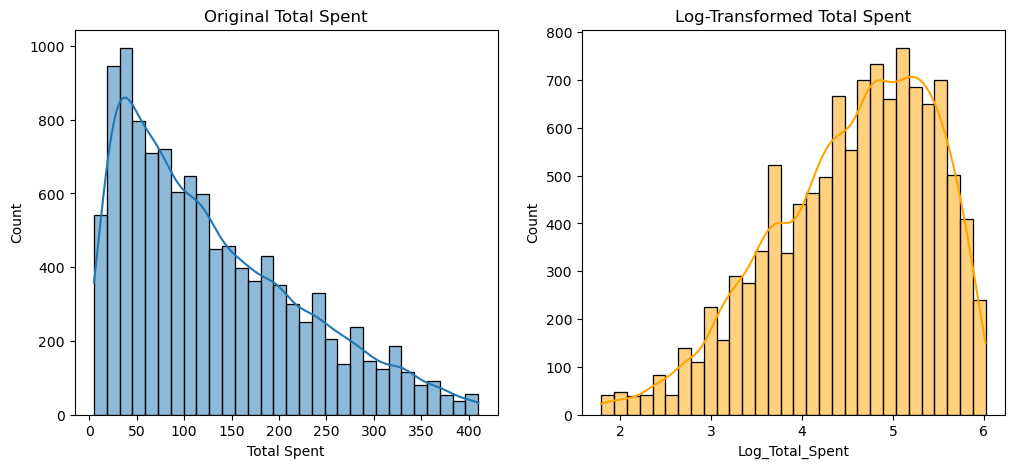

In [49]:
import numpy as np

# Log transform (add 1 to avoid log(0))
df["Log_Total_Spent"] = np.log1p(df["Total Spent"])

# Plot before & after
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df["Total Spent"], bins=30, kde=True)
plt.title("Original Total Spent")

plt.subplot(1,2,2)
sns.histplot(df["Log_Total_Spent"], bins=30, kde=True, color="orange")
plt.title("Log-Transformed Total Spent")

plt.show()

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df["Quantity_Scaled"] = scaler.fit_transform(df[["Quantity"]])

df["Quantity_Scaled"].mean(), df["Quantity_Scaled"].std()

(np.float64(-5.894090199382982e-17), 1.000044009241972)

In [51]:
original_mean = df["Total Spent"].mean()
original_mean

np.float64(129.64253652525963)

In [52]:
Q1 = df["Total Spent"].quantile(0.25)
Q3 = df["Total Spent"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data without outliers
df_no_outliers = df[(df["Total Spent"] >= lower_bound) & (df["Total Spent"] <= upper_bound)]

In [53]:
new_mean = df_no_outliers["Total Spent"].mean()
new_mean

np.float64(128.2538917388997)

In [54]:
print("Original Mean:", original_mean)
print("New Mean (No Outliers):", new_mean)

Original Mean: 129.64253652525963
New Mean (No Outliers): 128.2538917388997


In [55]:
encoded = pd.get_dummies(df["Payment Method"], drop_first=False)
encoded.head()

,Cash,Credit Card,Digital Wallet
0,False,False,True
1,False,False,True
2,False,True,False
3,False,True,False
4,False,False,True


In [56]:
encodedLocation = pd.get_dummies(df["Location"], drop_first=True)
encodedLocation.head()

,Online
0,True
1,True
2,True
3,True
4,True


In [57]:
df_encoded = pd.get_dummies(df, columns=["Payment Method", "Location"], drop_first=False)
df_encoded.head()

,Transaction ID,Customer ID,Category,Item,Price Per Unit,Quantity,Total Spent,Transaction Date,Discount Applied,YearMonth,Year,Log_Total_Spent,Quantity_Scaled,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Digital Wallet,Location_In-Store,Location_Online
0,TXN_6867343,CUST_09,Patisserie,Item_10_PAT,18.5,10.0,185.0,2024-04-08,True,2024-04,2024,5.225747,1.563891,False,False,True,False,True
1,TXN_3731986,CUST_22,Milk Products,Item_17_MILK,29.0,9.0,261.0,2023-07-23,True,2023-07,2023,5.568345,1.213633,False,False,True,False,True
2,TXN_9303719,CUST_02,Butchers,Item_12_BUT,21.5,2.0,43.0,2022-10-05,False,2022-10,2022,3.784190,-1.238171,False,True,False,False,True
3,TXN_9458126,CUST_06,Beverages,Item_16_BEV,27.5,9.0,247.5,2022-05-07,False,2022-05,2022,5.515443,1.213633,False,True,False,False,True
4,TXN_4575373,CUST_05,Food,Item_6_FOOD,12.5,7.0,87.5,2022-10-02,False,2022-10,2022,4.483003,0.513117,False,False,True,False,True


In [58]:
monthly_sales = df.groupby("YearMonth")["Total Spent"].sum()

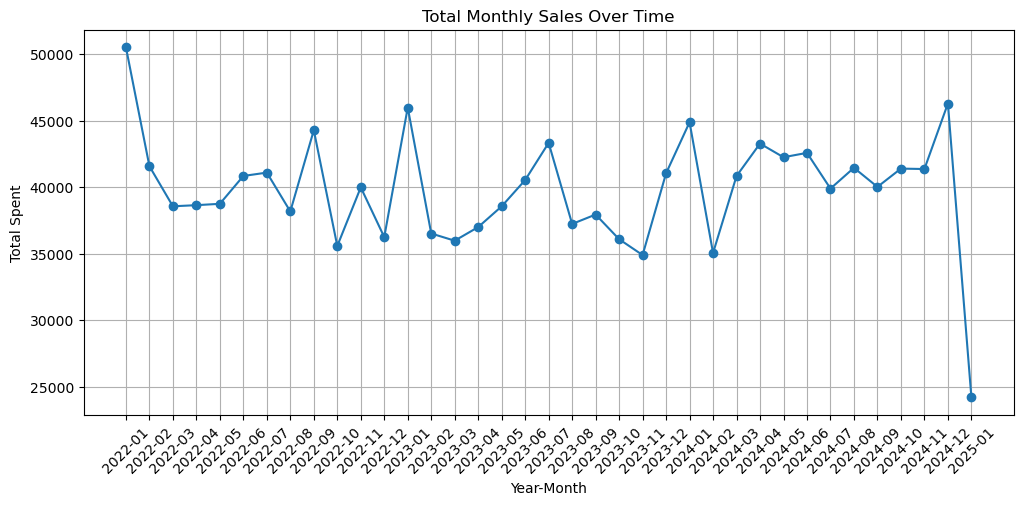

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o')
plt.title("Total Monthly Sales Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)   # rotate month labels so they fit
plt.grid(True)
plt.show()

In [60]:
yearly_sales = df.groupby("Year")["Total Spent"].sum()
print(yearly_sales)

Year
2022    484301.5
2023    465149.5
2024    499336.0
2025     24211.5
Name: Total Spent, dtype: float64


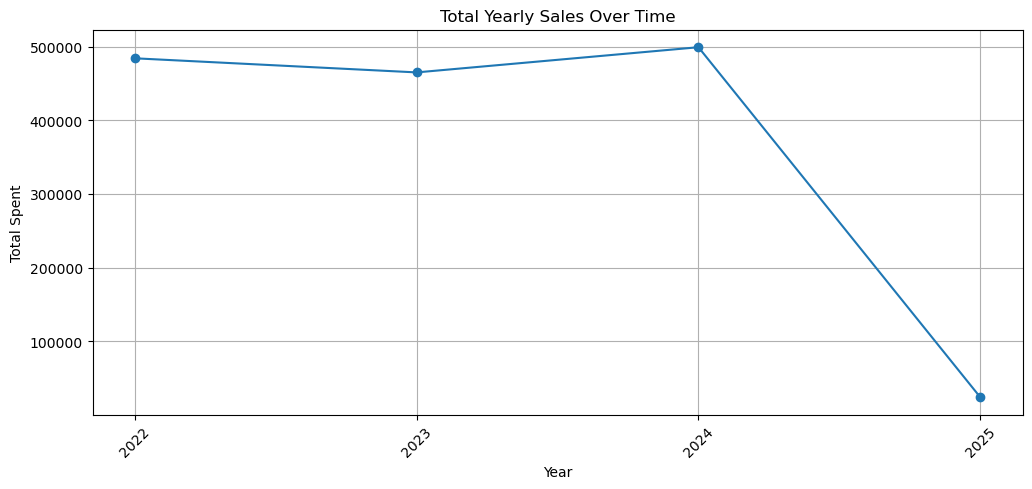

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(yearly_sales.index.astype(str), yearly_sales.values, marker='o')
plt.title("Total Yearly Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)   # rotate month labels so they fit
plt.grid(True)
plt.show()

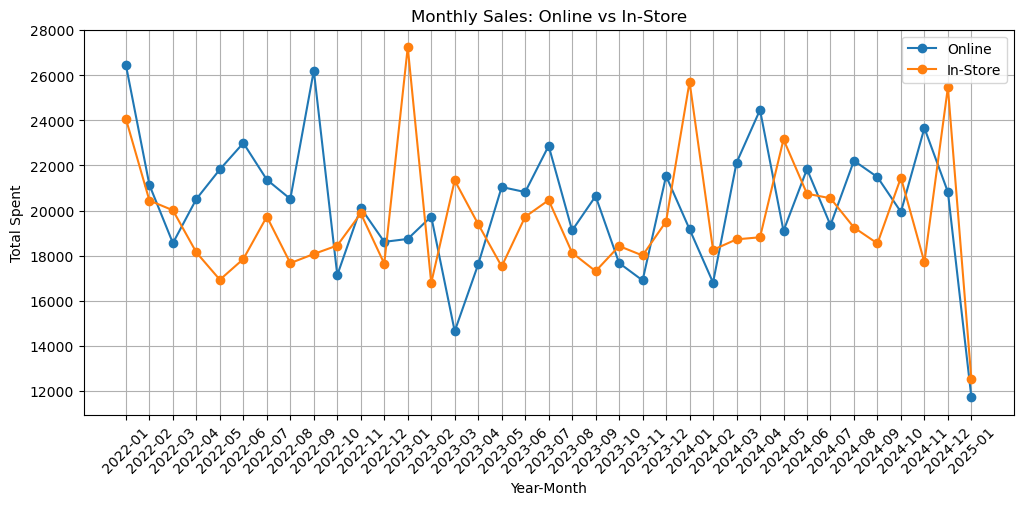

In [62]:
monthly_location_sales = df.groupby(["YearMonth","Location"])["Total Spent"].sum().unstack()

plt.figure(figsize=(12,5))
plt.plot(monthly_location_sales.index.astype(str), monthly_location_sales["Online"], label='Online', marker='o')
plt.plot(monthly_location_sales.index.astype(str), monthly_location_sales["In-Store"], label='In-Store', marker='o')

plt.title("Monthly Sales: Online vs In-Store")
plt.xlabel("Year-Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

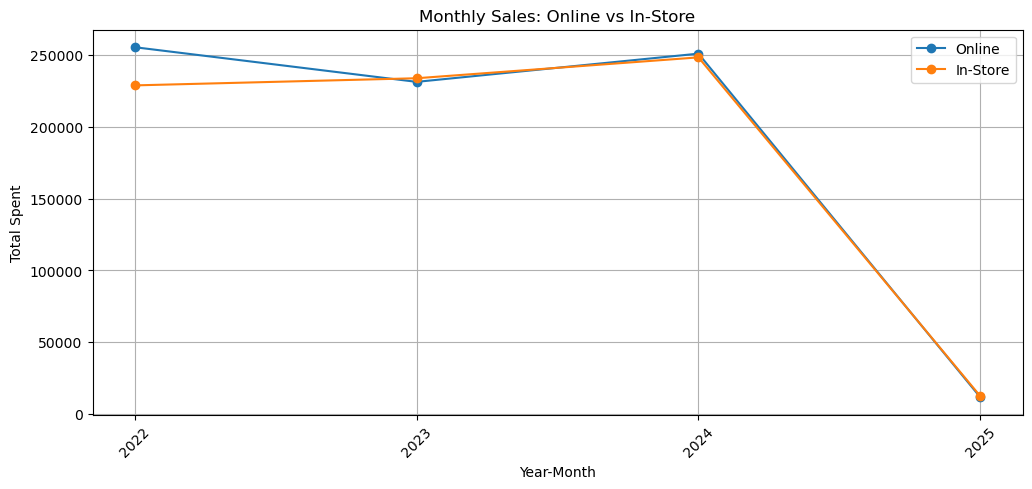

In [63]:
yearly_location_sales = df.groupby(["Year","Location"])["Total Spent"].sum().unstack()

plt.figure(figsize=(12,5))
plt.plot(yearly_location_sales.index.astype(str), yearly_location_sales["Online"], label='Online', marker='o')
plt.plot(yearly_location_sales.index.astype(str), yearly_location_sales["In-Store"], label='In-Store', marker='o')

plt.title("Monthly Sales: Online vs In-Store")
plt.xlabel("Year-Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

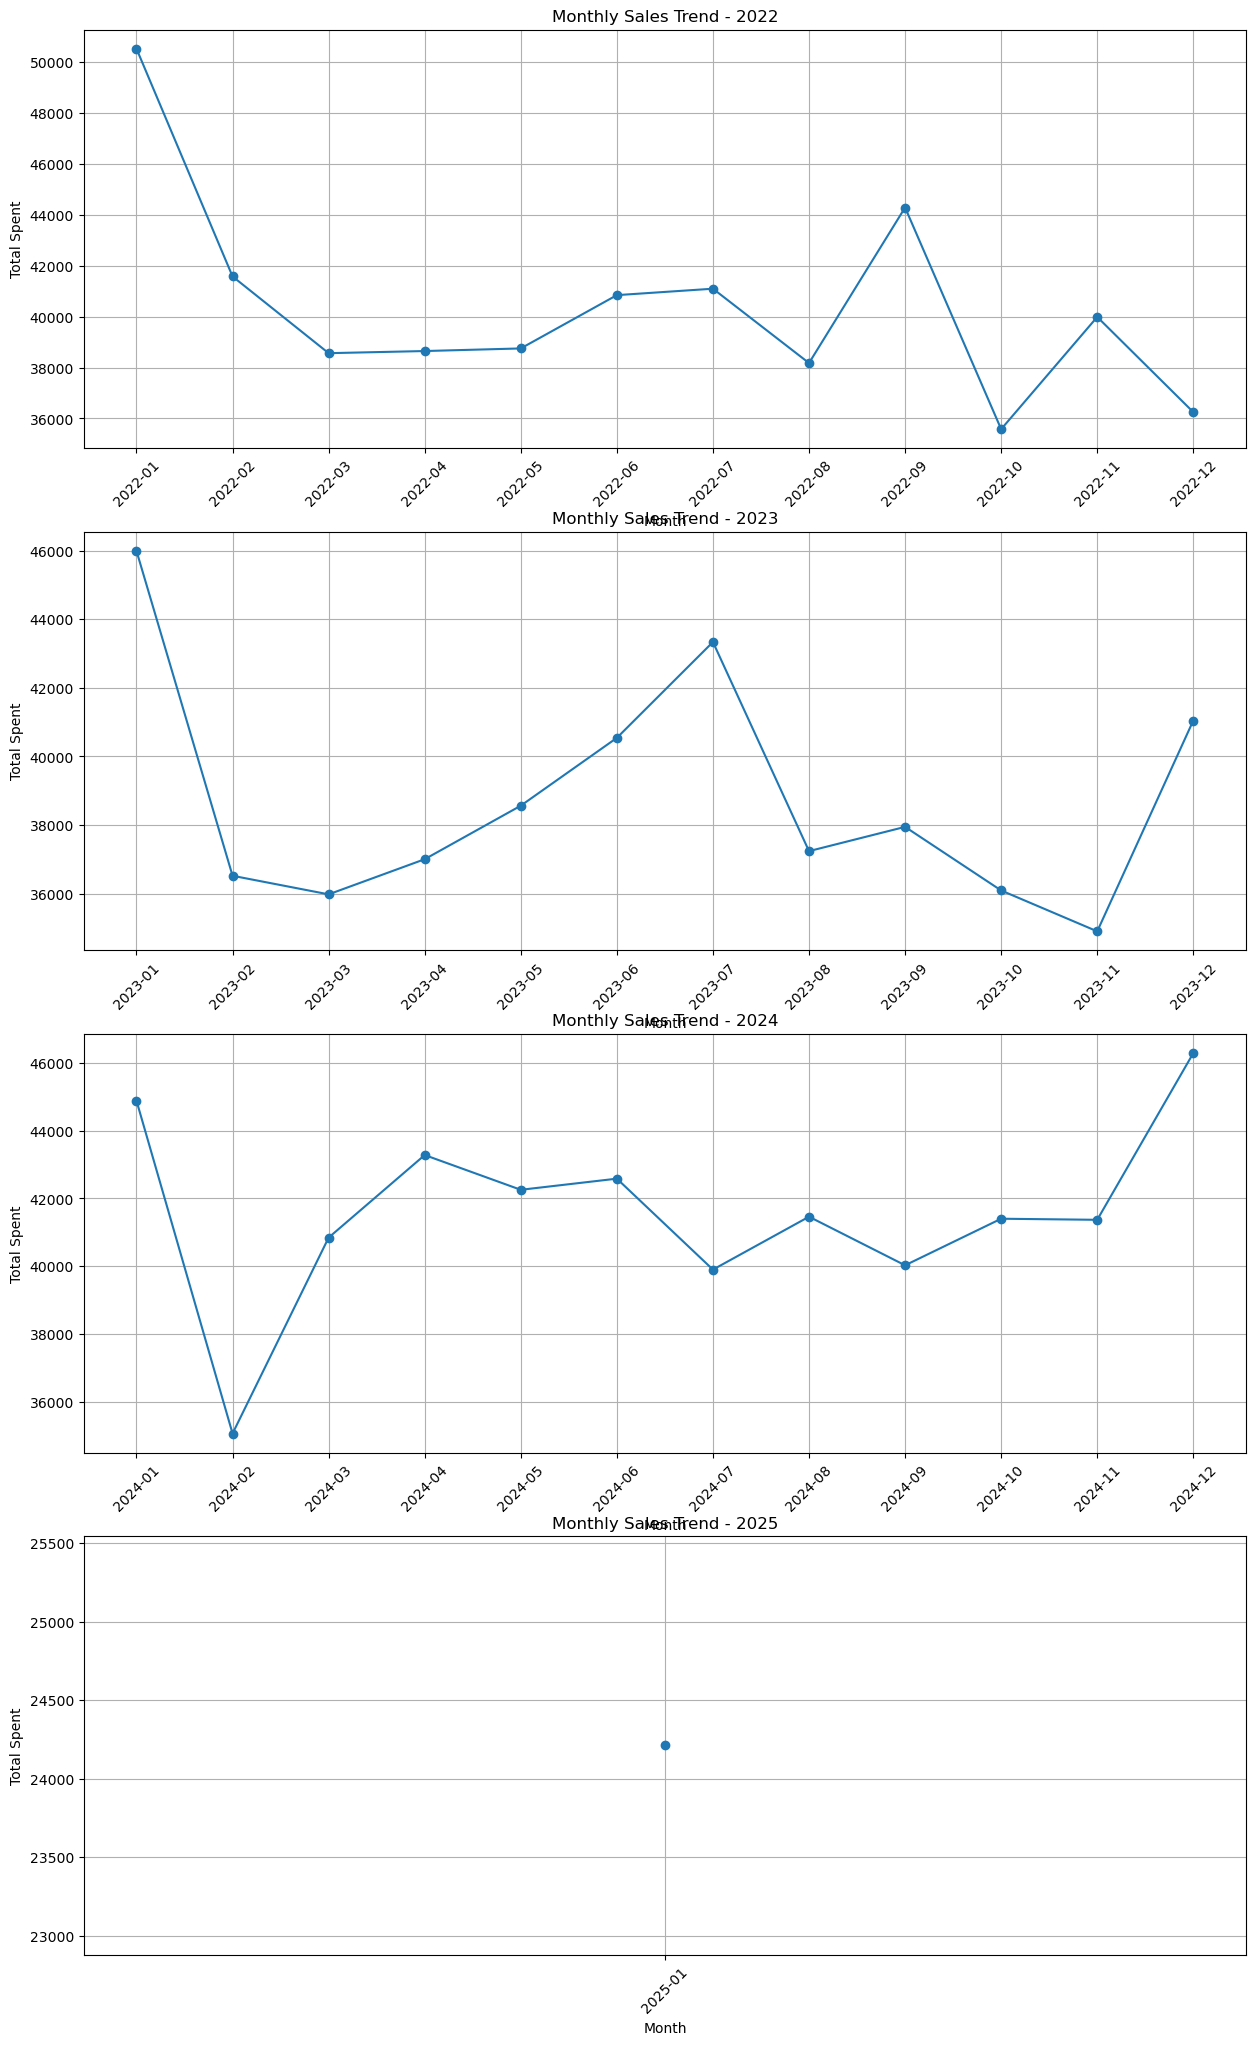

In [64]:
import matplotlib.pyplot as plt

df_2022 = df[df["Year"] == 2022]
monthly_sales_2022 = df_2022.groupby("YearMonth")["Total Spent"].sum()

df_2023 = df[df["Year"] == 2023]
monthly_sales_2023 = df_2023.groupby("YearMonth")["Total Spent"].sum()

df_2024 = df[df["Year"] == 2024]
monthly_sales_2024 = df_2024.groupby("YearMonth")["Total Spent"].sum()

df_2025 = df[df["Year"] == 2025]
monthly_sales_2025 = df_2025.groupby("YearMonth")["Total Spent"].sum()

plt.figure(figsize=(15,25))

plt.subplot(4,1,1)
plt.plot(monthly_sales_2022.index.astype(str), monthly_sales_2022.values, marker='o')
plt.title("Monthly Sales Trend - 2022")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(monthly_sales_2023.index.astype(str), monthly_sales_2023.values, marker='o')
plt.title("Monthly Sales Trend - 2023")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(4,1,3)
plt.plot(monthly_sales_2024.index.astype(str), monthly_sales_2024.values, marker='o')
plt.title("Monthly Sales Trend - 2024")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)

plt.subplot(4,1,4)
plt.plot(monthly_sales_2025.index.astype(str), monthly_sales_2025.values, marker='o')
plt.title("Monthly Sales Trend - 2025")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

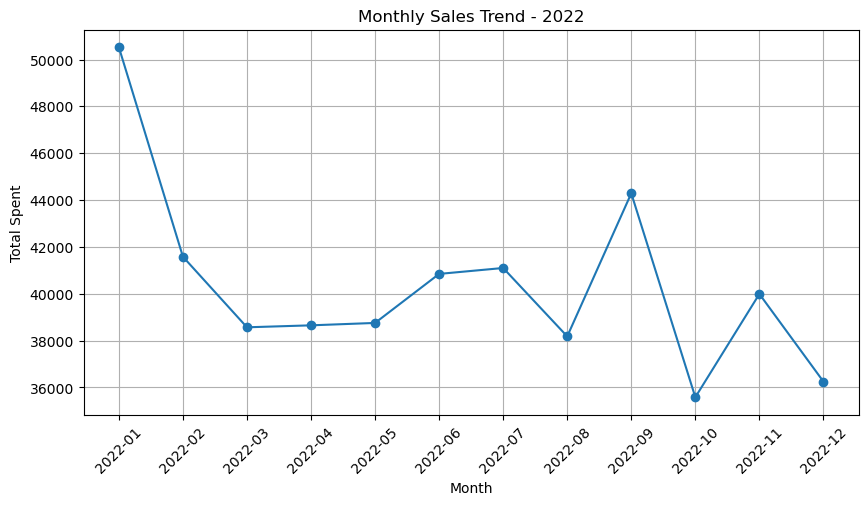

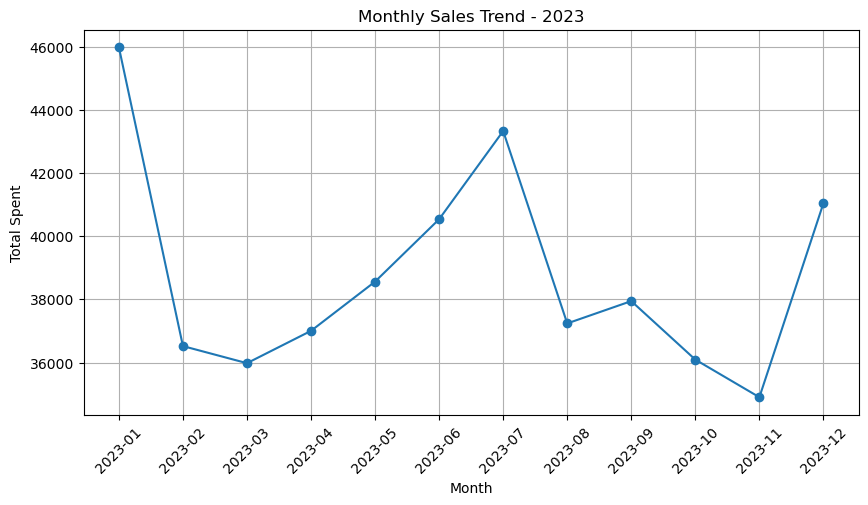

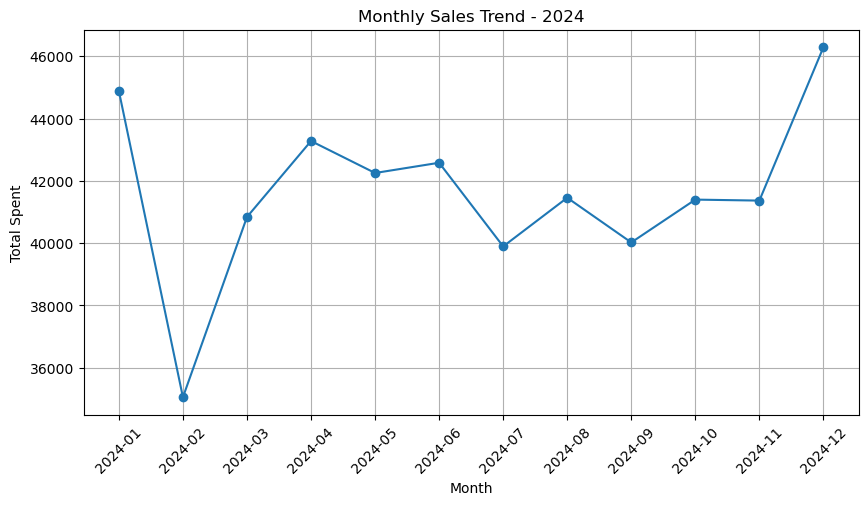

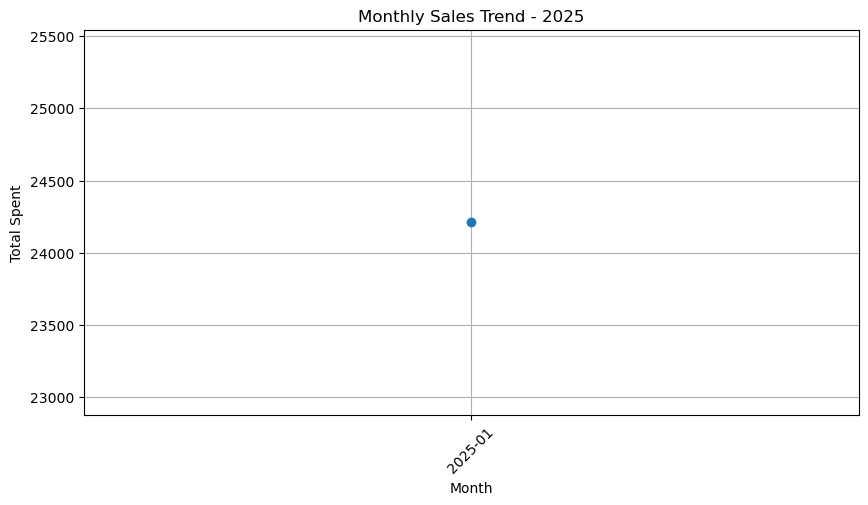

In [65]:
import matplotlib.pyplot as plt

# 2022
plt.figure(figsize=(10,5))
plt.plot(monthly_sales_2022.index.astype(str), monthly_sales_2022.values, marker='o')
plt.title("Monthly Sales Trend - 2022")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2023
plt.figure(figsize=(10,5))
plt.plot(monthly_sales_2023.index.astype(str), monthly_sales_2023.values, marker='o')
plt.title("Monthly Sales Trend - 2023")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2024
plt.figure(figsize=(10,5))
plt.plot(monthly_sales_2024.index.astype(str), monthly_sales_2024.values, marker='o')
plt.title("Monthly Sales Trend - 2024")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 2025
plt.figure(figsize=(10,5))
plt.plot(monthly_sales_2025.index.astype(str), monthly_sales_2025.values, marker='o')
plt.title("Monthly Sales Trend - 2025")
plt.xlabel("Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


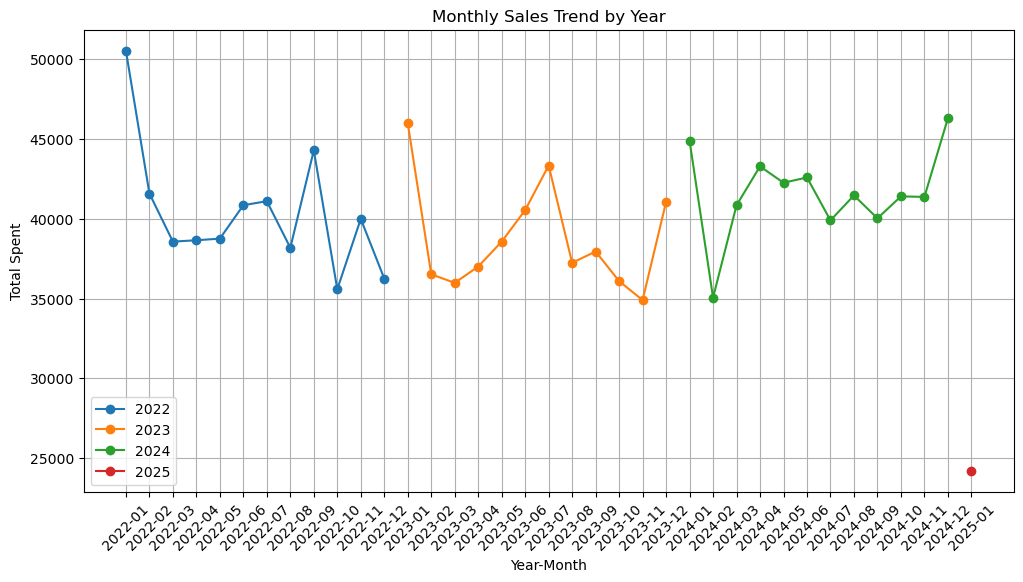

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(monthly_sales_2022.index.astype(str), monthly_sales_2022.values, marker='o', label='2022')
plt.plot(monthly_sales_2023.index.astype(str), monthly_sales_2023.values, marker='o', label='2023')
plt.plot(monthly_sales_2024.index.astype(str), monthly_sales_2024.values, marker='o', label='2024')
plt.plot(monthly_sales_2025.index.astype(str), monthly_sales_2025.values, marker='o', label='2025')

plt.title("Monthly Sales Trend by Year")
plt.xlabel("Year-Month")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.legend()          # shows the labels on the chart
plt.grid(True)
plt.show()


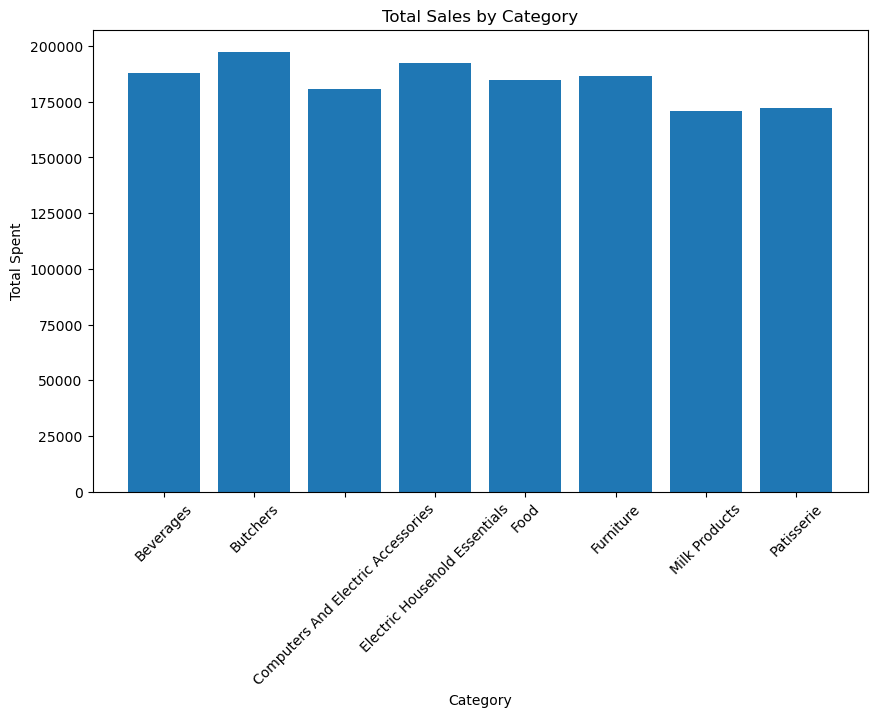

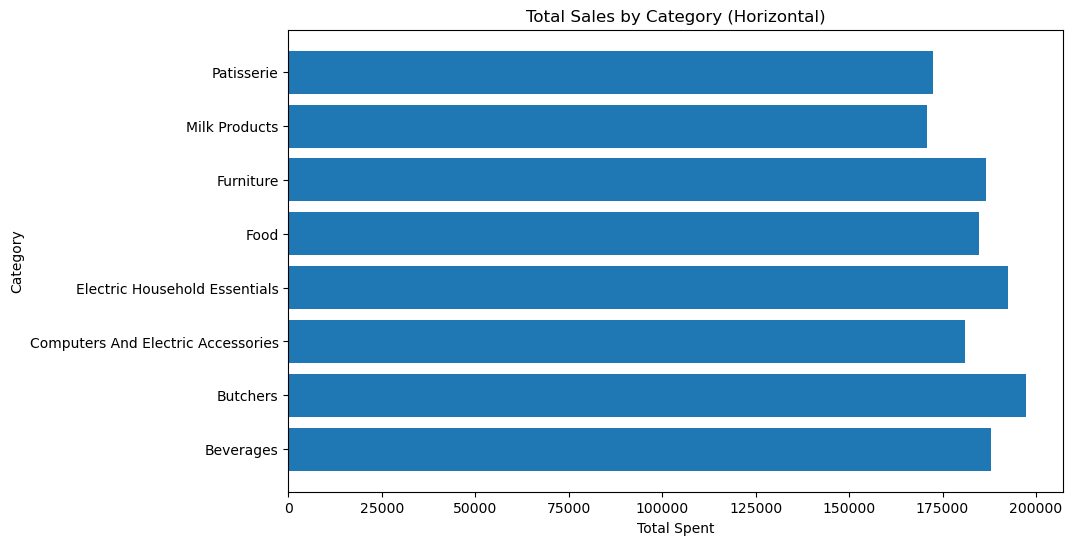

In [67]:
sales_by_category = df.groupby("Category")["Total Spent"].sum()

plt.figure(figsize=(10,6))
plt.bar(sales_by_category.index, sales_by_category.values)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)  # rotate x labels for readability
plt.show()

plt.figure(figsize=(10,6))
plt.barh(sales_by_category.index, sales_by_category.values)
plt.title("Total Sales by Category (Horizontal)")
plt.xlabel("Total Spent")
plt.ylabel("Category")
plt.show()


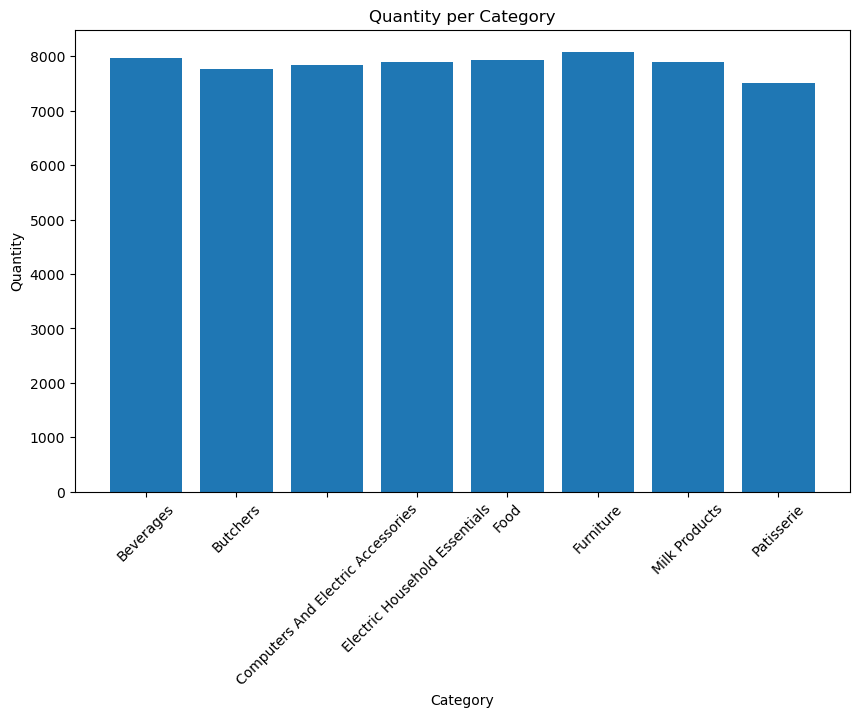

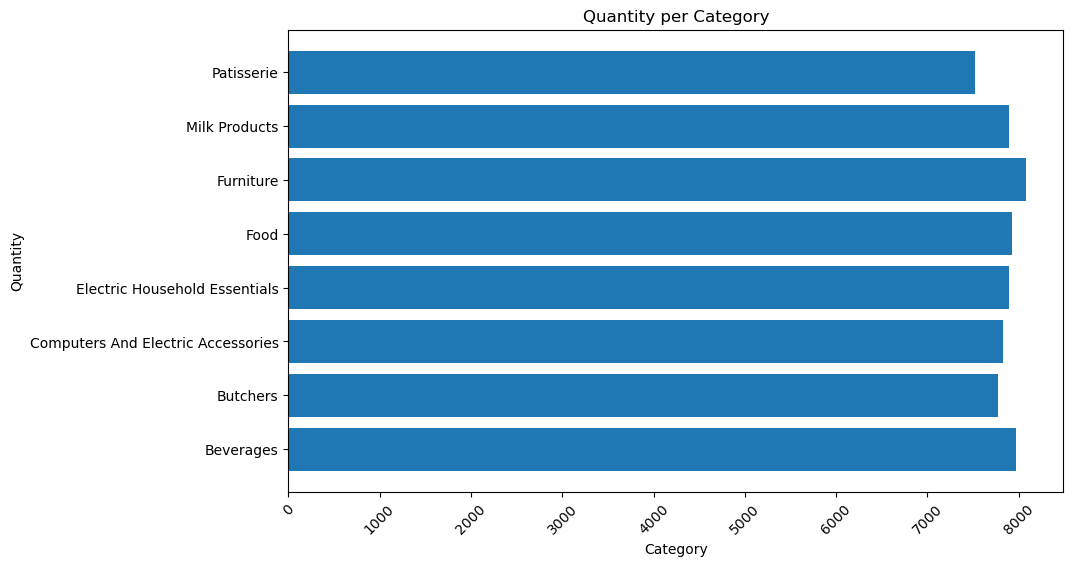

In [68]:
Quantity_by_category = df.groupby("Category")["Quantity"].sum()

plt.figure(figsize=(10,6))
plt.bar(Quantity_by_category.index, Quantity_by_category.values)
plt.title("Quantity per Category")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.xticks(rotation = 45 )
plt.show()

plt.figure(figsize=(10,6))
plt.barh(Quantity_by_category.index, Quantity_by_category.values)
plt.title("Quantity per Category")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.xticks(rotation = 45 )
plt.show()


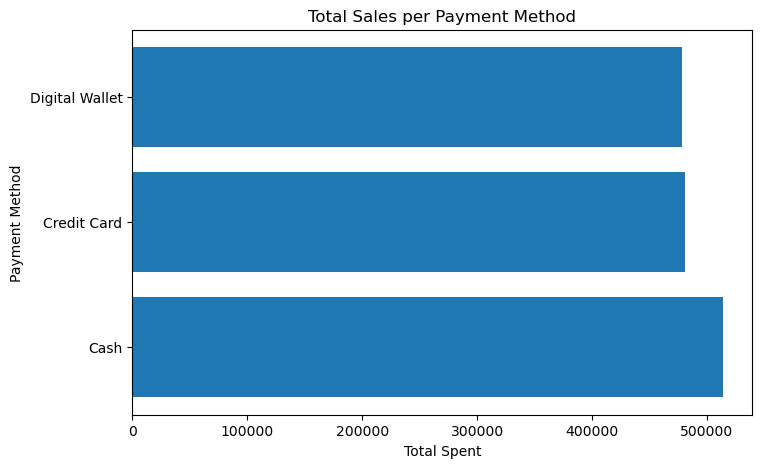

In [69]:
sales_by_payment = df.groupby("Payment Method")["Total Spent"].sum()

plt.figure(figsize=(8,5))
plt.barh(sales_by_payment.index, sales_by_payment.values)
plt.title("Total Sales per Payment Method")
plt.xlabel("Total Spent")
plt.ylabel("Payment Method")
plt.show()

In [70]:
# group by Category and Location and sum Total Spent
category_location_sales = df.groupby(["Category","Location"])["Total Spent"].sum().unstack(fill_value=0)
category_location_sales.head()


Location,In-Store,Online
Category,,
Beverages,93753.5,94225.0
Butchers,97626.0,99800.0
Computers And Electric Accessories,82653.5,98249.0
Electric Household Essentials,92338.5,100103.0
Food,90613.0,94032.0


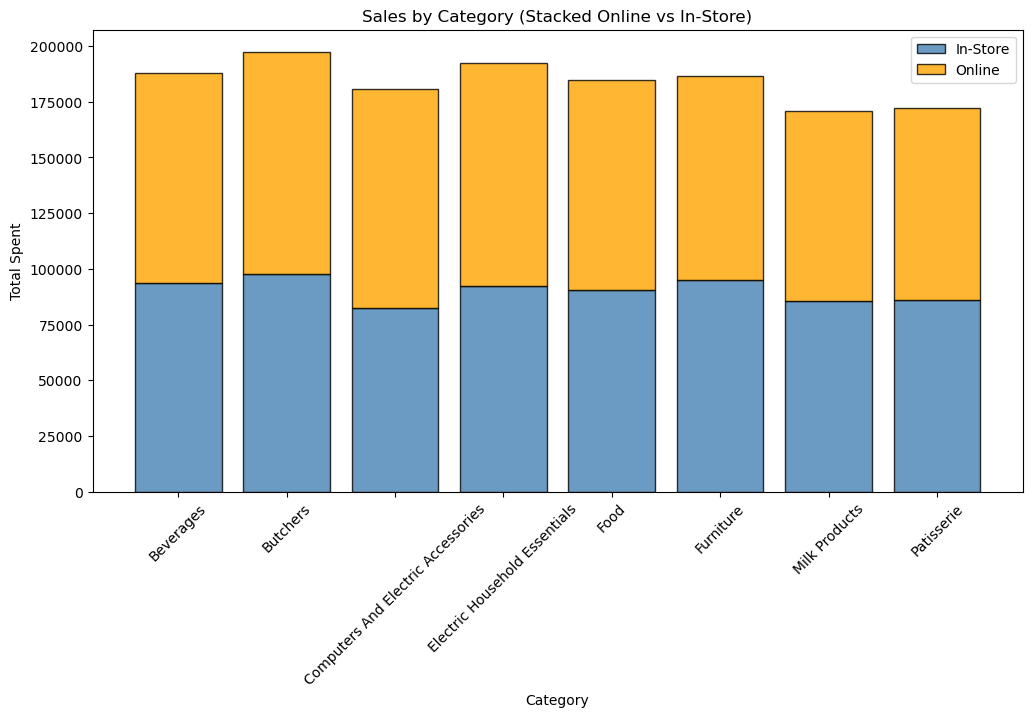

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.bar(category_location_sales.index,
        category_location_sales["In-Store"],
        label='In-Store', 
        color='steelblue', edgecolor='black', alpha=0.8)

plt.bar(category_location_sales.index,
        category_location_sales["Online"],
        bottom=category_location_sales["In-Store"],
        label='Online',
        color='orange', edgecolor='black', alpha=0.8)

plt.title("Sales by Category (Stacked Online vs In-Store)")
plt.xlabel("Category")
plt.ylabel("Total Spent")
plt.xticks(rotation=45)
plt.legend()
plt.show()

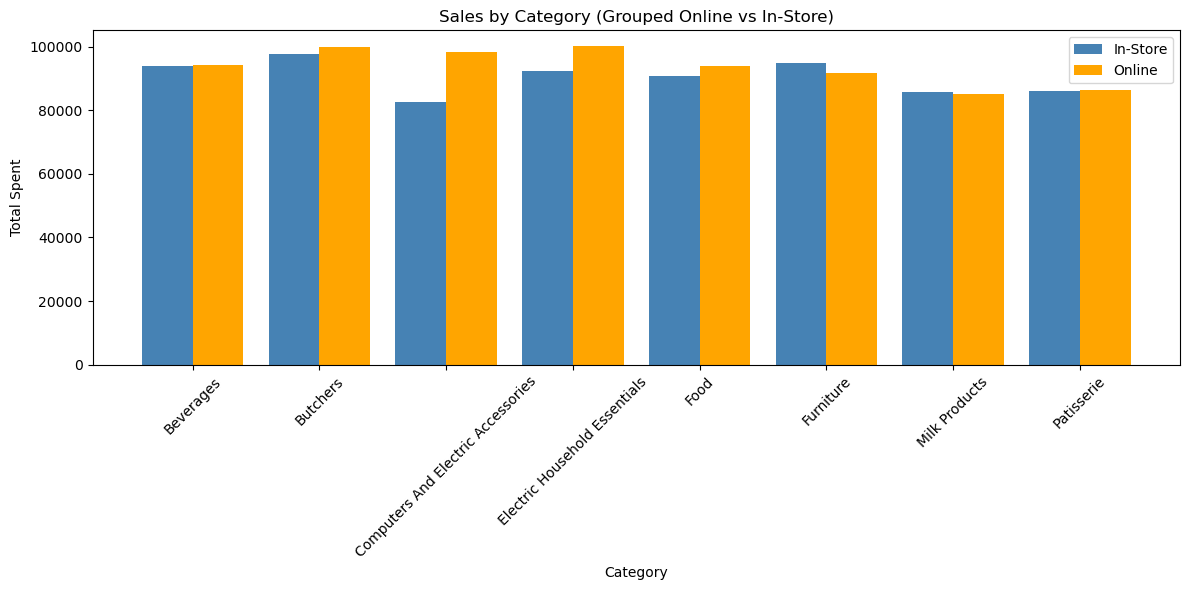

In [72]:
import numpy as np
import matplotlib.pyplot as plt

categories = category_location_sales.index
in_store = category_location_sales["In-Store"]
online = category_location_sales["Online"]

x = np.arange(len(categories))            # positions for categories
width = 0.4                               # width of each bar

plt.figure(figsize=(12,6))

# left bars
plt.bar(x - width/2, in_store, width, label='In-Store', color='steelblue')

# right bars
plt.bar(x + width/2, online, width, label='Online', color='orange')

plt.title("Sales by Category (Grouped Online vs In-Store)")
plt.xlabel("Category")
plt.ylabel("Total Spent")
plt.xticks(x, categories, rotation=45)    # set category names at x positions
plt.legend()
plt.tight_layout()
plt.show()


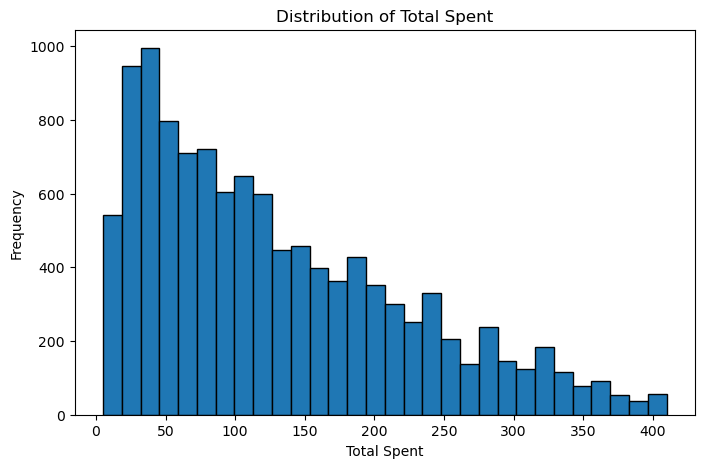

In [73]:
plt.figure(figsize=(8,5))
plt.hist(df["Total Spent"], bins=30, edgecolor='black')
plt.title("Distribution of Total Spent")
plt.xlabel("Total Spent")
plt.ylabel("Frequency")
plt.show()


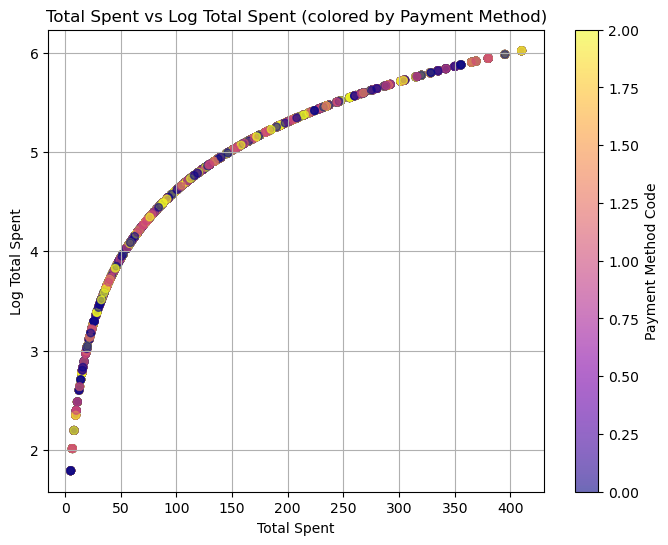

In [74]:
import matplotlib.pyplot as plt

# Assign numeric colors to each payment method
payment_colors = df["Payment Method"].astype('category').cat.codes

plt.figure(figsize=(8,6))
plt.scatter(df["Total Spent"],
            df["Log_Total_Spent"],
            c=payment_colors,       # different color per payment method
            alpha=0.6, 
            cmap='plasma', 
            s=30)

plt.title("Total Spent vs Log Total Spent (colored by Payment Method)")
plt.xlabel("Total Spent")
plt.ylabel("Log Total Spent")

# Add colorbar with tick labels
cbar = plt.colorbar()
cbar.set_label("Payment Method Code")

plt.grid(True)
plt.show()


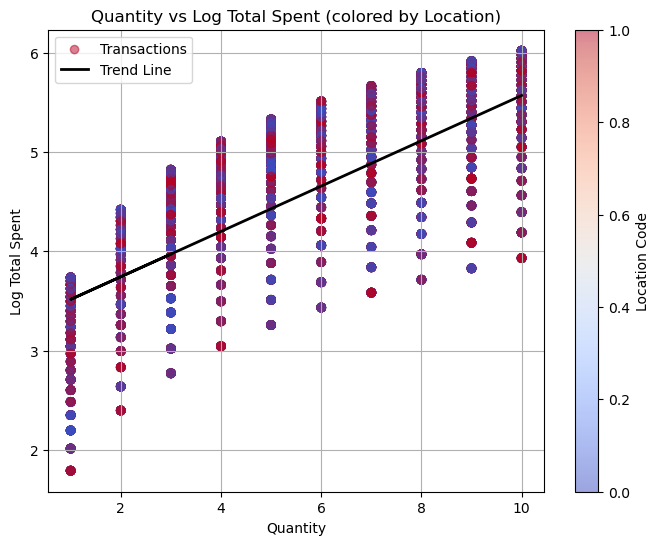

In [79]:
import numpy as np
import matplotlib.pyplot as plt

x = df["Quantity"]
y = df["Log_Total_Spent"]

# Fit a regression line y = m*x + b
m, b = np.polyfit(x, y, 1)

# Assign numeric colors to each Location (Online/In-Store)
location_colors = df["Location"].astype('category').cat.codes

plt.figure(figsize=(8,6))
plt.scatter(x, y, c=location_colors, cmap='coolwarm', alpha=0.5, label="Transactions")
plt.plot(x, m*x + b, color='black', linewidth=2, label="Trend Line")

plt.title("Quantity vs Log Total Spent (colored by Location)")
plt.xlabel("Quantity")
plt.ylabel("Log Total Spent")
plt.colorbar(label="Location Code")
plt.legend()
plt.grid(True)
plt.show()

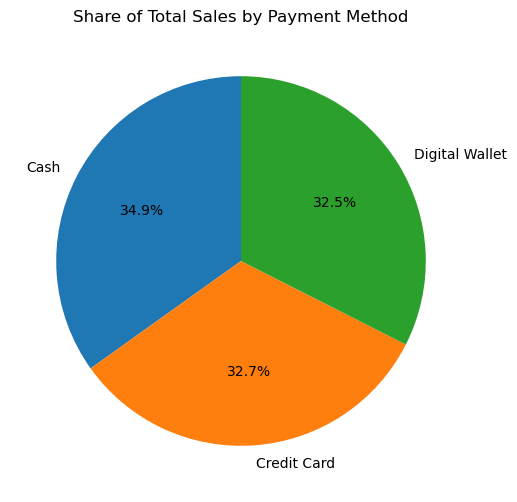

In [83]:
sales_by_payment = df.groupby("Payment Method")["Total Spent"].sum()

plt.figure(figsize=(6,6))
plt.pie(sales_by_payment.values,
        labels=sales_by_payment.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Share of Total Sales by Payment Method")
plt.show()

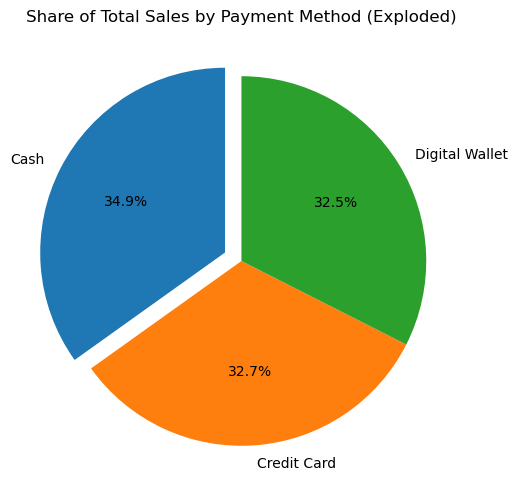

In [84]:
explode = [0.1, 0, 0]  # first slice separated
plt.figure(figsize=(6,6))
plt.pie(sales_by_payment.values,
        labels=sales_by_payment.index,
        autopct='%1.1f%%',
        startangle=90,
        explode=explode)
plt.title("Share of Total Sales by Payment Method (Exploded)")
plt.show()

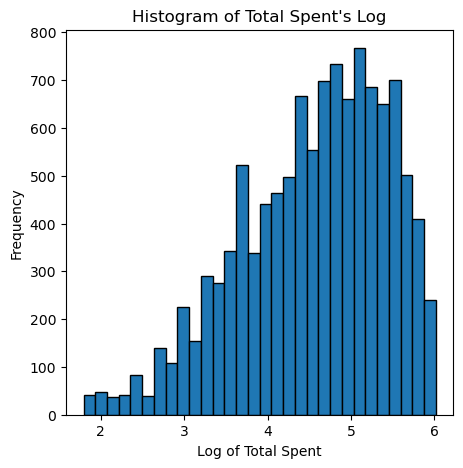

In [87]:
plt.figure(figsize=(5,5))
plt.hist(df["Log_Total_Spent"], bins=30, edgecolor='black')
plt.xlabel("Log of Total Spent")
plt.ylabel("Frequency")
plt.title("Histogram of Total Spent's Log")
plt.show()

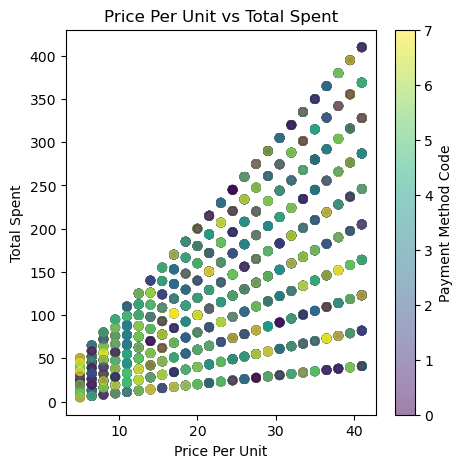

In [96]:
c=df["Category"].astype('category').cat.codes
plt.figure(figsize=(5,5))
plt.scatter(df["Price Per Unit"],df["Total Spent"],c = c, alpha = 0.5)
plt.title("Price Per Unit vs Total Spent")
plt.xlabel("Price Per Unit")
plt.ylabel("Total Spent")
cbar = plt.colorbar()
cbar.set_label("Payment Method Code")
plt.show()

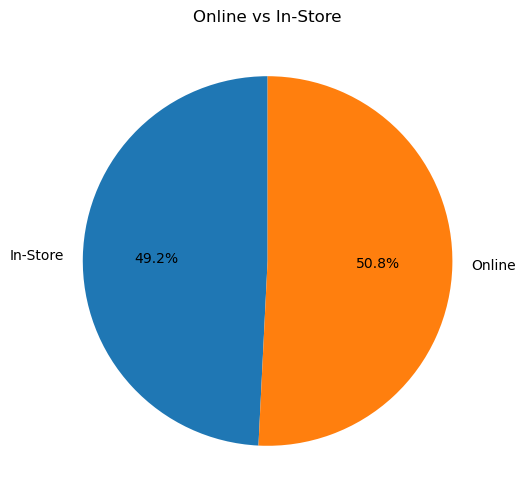

In [95]:
Quantity_by_Location=df.groupby("Location")["Quantity"].sum()

plt.figure(figsize=(6,6))
plt.pie(Quantity_by_Location.values,
        labels=Quantity_by_Location.index,
        autopct='%1.1f%%',
        startangle=90)
plt.title("Online vs In-Store")
plt.show()